In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load data

In [9]:
path = "../data/water_dataset_reshaped.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Specific conductance (Maximum),"pH, standard units (Maximum)","pH, standard units (Minimum)",Specific conductance (Minimum),Specific conductance (Mean),Dissolved oxygen (Maximum),Dissolved oxygen (Mean),Dissolved oxygen (Minimum),Temperature (Mean),Temperature (Minimum),Temperature (Maximum),Target
0,0,0.001131,0.884615,0.001120,0.001113,0.677632,0.841463,0.765152,0.787402,0.293750,0.298077,0.276163,0.648148
1,1,0.001170,0.871795,0.001159,0.001152,0.703947,0.829268,0.772727,0.795276,0.293750,0.301282,0.276163,0.648148
2,2,0.001326,0.884615,0.001198,0.001250,0.677632,0.853659,0.750000,0.755906,0.300000,0.298077,0.287791,0.648148
3,3,0.014094,0.858974,0.001238,0.003926,0.697368,0.829268,0.772727,0.771654,0.296875,0.294872,0.279070,0.638889
4,4,0.088109,0.858974,0.010766,0.029297,0.684211,0.853659,0.765152,0.755906,0.296875,0.291667,0.281977,0.648148


# Dropping unused column

In [10]:
df = df.drop("Unnamed: 0", axis=1)
df.head()

,Specific conductance (Maximum),"pH, standard units (Maximum)","pH, standard units (Minimum)",Specific conductance (Minimum),Specific conductance (Mean),Dissolved oxygen (Maximum),Dissolved oxygen (Mean),Dissolved oxygen (Minimum),Temperature (Mean),Temperature (Minimum),Temperature (Maximum),Target
0,0.001131,0.884615,0.001120,0.001113,0.677632,0.841463,0.765152,0.787402,0.293750,0.298077,0.276163,0.648148
1,0.001170,0.871795,0.001159,0.001152,0.703947,0.829268,0.772727,0.795276,0.293750,0.301282,0.276163,0.648148
2,0.001326,0.884615,0.001198,0.001250,0.677632,0.853659,0.750000,0.755906,0.300000,0.298077,0.287791,0.648148
3,0.014094,0.858974,0.001238,0.003926,0.697368,0.829268,0.772727,0.771654,0.296875,0.294872,0.279070,0.638889
4,0.088109,0.858974,0.010766,0.029297,0.684211,0.853659,0.765152,0.755906,0.296875,0.291667,0.281977,0.648148


# Adding categorical variables to data

In [ ]:
categorical = ["Hardness", "Mineral content"]
hardness = ["soft", "hard"]
hardness_prob = [0.4, 0.6]
mineral = ["low", "high"]
mineral_prob = [0.8, 0.2]

hardness_sample = np.random.choice(hardness, size=len(df), p=hardness_prob)
mineral_sample = np.random.choice(mineral, size=len(df), p=mineral_prob)

df["Hardness"] = hardness_sample
df["Mineral content"] = mineral_sample

In [13]:
columns = [col for col in df if col != 'Target'] + ['Target']
df = df[columns]
df.head()

,Specific conductance (Maximum),"pH, standard units (Maximum)","pH, standard units (Minimum)",Specific conductance (Minimum),Specific conductance (Mean),Dissolved oxygen (Maximum),Dissolved oxygen (Mean),Dissolved oxygen (Minimum),Temperature (Mean),Temperature (Minimum),Temperature (Maximum),Hardness,Mineral content,Target
0,0.001131,0.884615,0.001120,0.001113,0.677632,0.841463,0.765152,0.787402,0.293750,0.298077,0.276163,hard,low,0.648148
1,0.001170,0.871795,0.001159,0.001152,0.703947,0.829268,0.772727,0.795276,0.293750,0.301282,0.276163,hard,low,0.648148
2,0.001326,0.884615,0.001198,0.001250,0.677632,0.853659,0.750000,0.755906,0.300000,0.298077,0.287791,soft,low,0.648148
3,0.014094,0.858974,0.001238,0.003926,0.697368,0.829268,0.772727,0.771654,0.296875,0.294872,0.279070,soft,low,0.638889
4,0.088109,0.858974,0.010766,0.029297,0.684211,0.853659,0.765152,0.755906,0.296875,0.291667,0.281977,hard,low,0.648148


# Distribution of categorical variables

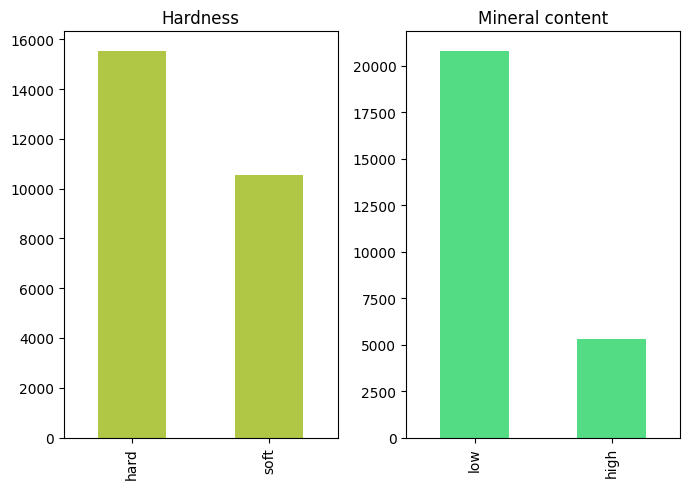

In [23]:
def random_color():
    return (np.random.random(), np.random.random(), np.random.random())

fig, axes = plt.subplots(1, 2, figsize=(7, 5))
axes = axes.flatten()

for idx, c in enumerate(categorical):
    category_counts = df[c].value_counts()
    category_counts.plot(kind='bar', ax=axes[idx], color=random_color())
    axes[idx].set_title(c)
    axes[idx].set_xlabel("")

plt.tight_layout()
plt.show()